In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


In [2]:
#load the csv data to a pandas dataframe
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#droping CustomerID column as this is not required for modeling
df=df.drop(columns=['customerID'])


In [8]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#printing the unique values in all the columns
numerical_features_list=['tenure','MonthlyCharges','TotalCharges']

for col in df.columns:
    if col not in numerical_features_list: 
        print(col,df[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
len(df[df['TotalCharges']==' '])

11

In [15]:
df['TotalCharges']=df['TotalCharges'].replace((" ","0.0"))

/tmp/ipykernel_11731/3900797600.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['TotalCharges']=df['TotalCharges'].replace((" ","0.0"))


In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object' and column != 'customerID':
        df[column] = le.fit_transform(df[column])

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [18]:
# checking the class distribution of target column
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [19]:
"""Insights:
1.customerid removed as it is not required for modeling
2.no missing values in the dataset
3.Missing values in the TotalCharges column were replaced with 0
4.Class imbalence identified in the target"""

'Insights:\n1.customerid removed as it is not required for modeling\n2.no missing values in the dataset\n3.Missing values in the TotalCharges column were replaced with 0\n4.Class imbalence identified in the target'

In [20]:
#Exploratory Data Analysis(EDA)
df.shape

(7043, 20)

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2285.169963,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2267.544511,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.675000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1398.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3803.050000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [23]:
##Numerical Features - Analysis
#Understand the distribution of the numerical features
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of (column_name)")
    
    
    #cal the mean and median values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    
    
    # add vertical lines for mean and median
    plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
    plt.axvline(col_median,color='green',linestyle='--',label='Median')
    plt.legend()
    plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Make sure seaborn is imported

def plot_histogram(df, column_name):
    ##Numerical Features - Analysis
    #Understand the distribution of the numerical features
    plt.figure(figsize=(5,3))

    sns.histplot(df[column_name], kde=True) 

    plt.title(f"Distribution of {column_name}")

    #cal the mean and median values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
    plt.axvline(col_median,color='green',linestyle='--',label='Median')
    plt.legend()
    plt.show()

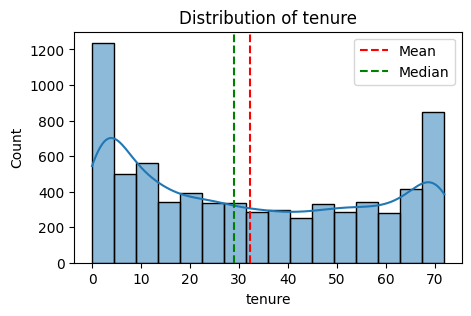

In [25]:
plot_histogram(df,'tenure')

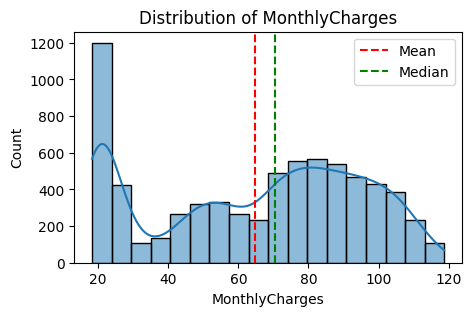

In [26]:
plot_histogram(df,'MonthlyCharges')

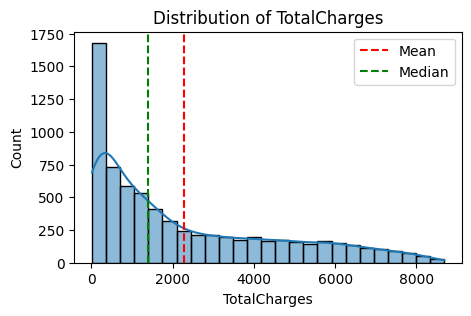

In [27]:
plot_histogram(df,'TotalCharges')

In [28]:
#box plot for numerical features
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()
    

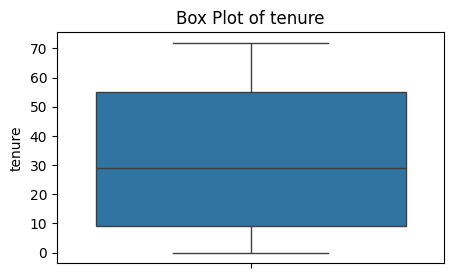

In [29]:
plot_boxplot(df,'tenure')

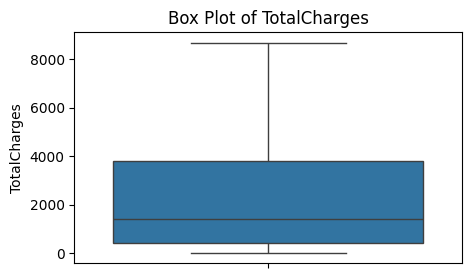

In [30]:
plot_boxplot(df,'TotalCharges')

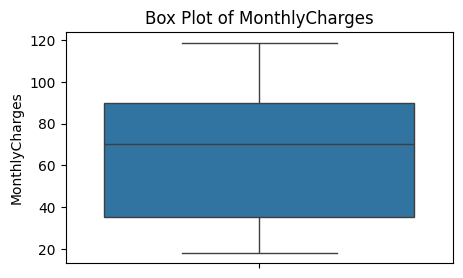

In [31]:
plot_boxplot(df,'MonthlyCharges')

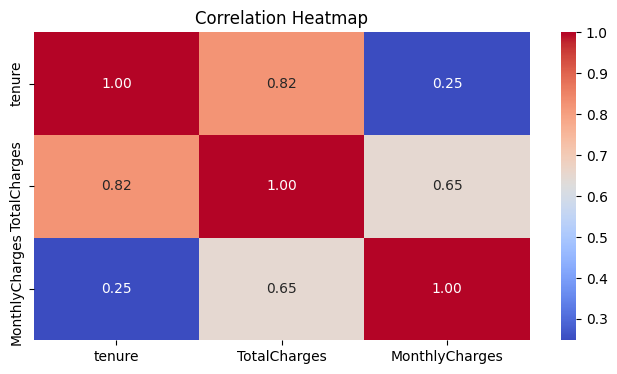

In [32]:
#Correlation Heatmap for numerical columns
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','TotalCharges','MonthlyCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
#Categorical features - Analysis
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


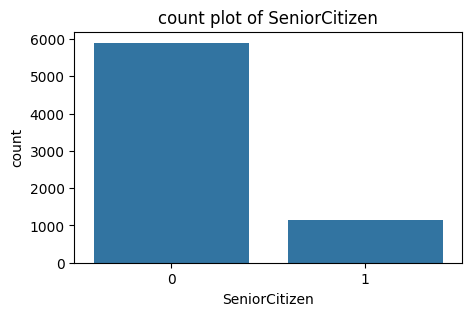

In [35]:
#Countplot for carogorical columns

object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=['SeniorCitizen']+object_cols
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()

In [36]:
#Data preprocessing
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
#Label encoding of target column
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [39]:
#Label encoding of categorical features
#Indentifying columns with object data type
object_cols=df.select_dtypes(include="object").columns
object_cols

Index([], dtype='object')

In [40]:
#Initialize a dictionary to save the encoders
encoders={}
#apply label encoding and store the encoders
for column in object_cols:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder
    
    #save the encoder to a pickel file
    with open("encoders.pkl",'wb') as f:
        pickle.dump(encoders,f)

In [41]:
encoders

{}

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
#Tranining and Test data split
#spliting the features and target
X=df.drop(columns=['Churn'])
y=df['Churn']

In [44]:
#split training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [45]:
print(y_train.shape)


(5634,)


In [46]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [47]:
#synthetic minority oversampling technique(SMOTE)
smote=SMOTE(random_state=42)


In [48]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)


/home/jupyter-711123243024/.local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [49]:
print(y_train_smote.shape)

(8276,)


In [50]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [51]:
##model training
#training with default hyperparameters
#dictionary of models
models={'Decision Tree':DecisionTreeClassifier(random_state=42),
       'Random Forest':RandomForestClassifier(random_state=42),
       'XGBoost':XGBClassifier(random_state=42)}



In [52]:
#dictionary to store the cross validation results
cv_scores={}
#perform S-fold cross validation for each model
for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores
    print(f"{model_name} cross-validation accuracy:{np.mean(scores):.2f}")
    print('-'*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy:0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy:0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy:0.83
----------------------------------------------------------------------


In [53]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71540785, 0.81812689, 0.83564955, 0.84169184]),
 'Random Forest': array([0.72403382, 0.77280967, 0.90392749, 0.89546828, 0.89909366]),
 'XGBoost': array([0.70833333, 0.74984894, 0.90996979, 0.89003021, 0.9021148 ])}

In [54]:
#random forest gives the highest accuracy compared to other models with default parameters
rfc=RandomForestClassifier(random_state=42)

In [55]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [56]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [57]:
#model evaluation
#evaluate on test data 
y_test_pred=rfc.predict(X_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.7814052519517388
Confusion matrix:
 [[881 155]
 [153 220]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [58]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [59]:
# save the trained model as a pickle file
model_data={"model":rfc,"feature_names":X.columns.tolist()}
with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [60]:
#7.load the same model and the feature names
with open("customer_churn_model.pkl","rb") as f:
    model_data=pickle.load(f)
    loaded_model=model_data["model"]
    feature_names=model_data["feature_names"]
    

In [61]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [62]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [63]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
input_data_df=pd.DataFrame([input_data])
with open("encoders.pkl","rb") as f:
    encoders=pickle.load(f)

    
#encode categorical features  using the saved encoders
for column,encoder in encoders.items():
    input_data_df[column]=encoder.transform(input_data_df[column])

#make a prediction
prediction=loaded_model.predict(input_data_df)
pred_prob=loaded_model.predict_proba(input_data_df)
print(prediction)
#results
print(f"Prediction:{'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Prediction Probability:{pred_prob}")

[0]
Prediction:No Churn
Prediction Probability:[[0.79 0.21]]


In [64]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [65]:
#implementing hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best model
print(" Best Parameters Found:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Best Parameters Found: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

 Accuracy: 0.8055358410220014

 Confusion Matrix:
 [[945  91]
 [183 190]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409



In [66]:
# Make predictions with the best model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")



Logistic Regression Accuracy: 0.8169
KNN Accuracy: 0.7573
Random Forest Accuracy: 0.7977


/home/jupyter-711123243024/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7949


In [67]:
print(y.value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


In [68]:

#trying downsampling

df_combined = pd.concat([X, y], axis=1)

# Separate majority and minority classes (0 = No, 1 = Yes)
majority = df_combined[df_combined.Churn == 0]
minority = df_combined[df_combined.Churn == 1]

# Downsample majority class to match minority size
majority_downsampled = majority.sample(len(minority), random_state=42)

# Combine and shuffle
df_downsampled = pd.concat([majority_downsampled, minority]).sample(frac=1, random_state=42)

# Separate features and target again
X_down = df_downsampled.drop('Churn', axis=1)
y_down = df_downsampled['Churn']


In [69]:
from sklearn.model_selection import train_test_split

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(
    X_down, y_down, test_size=0.2, stratify=y_down, random_state=42
)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_down, y_train_down)

print("Best Parameters on Downsampled Data:", grid_search.best_params_)

best_model_down = grid_search.best_estimator_


Best Parameters on Downsampled Data: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [71]:
#try startified k fold cv
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create Stratified K-Folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
fold_accuracies = []
fold = 1

for train_index, test_index in skf.split(X_down, y_down):
    X_train_fold, X_test_fold = X_down.iloc[train_index], X_down.iloc[test_index]
    y_train_fold, y_test_fold = y_down.iloc[train_index], y_down.iloc[test_index]

    # Initialize model with best hyperparameters
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=42
    )
    
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    
    acc = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(acc)
    
    print(f"\n Fold {fold} Accuracy: {acc:.4f}")
    print(" Confusion Matrix:\n", confusion_matrix(y_test_fold, y_pred_fold))
    print(" Classification Report:\n", classification_report(y_test_fold, y_pred_fold))
    fold += 1

# Final average accuracy
print("\nAverage Accuracy across all folds:", np.mean(fold_accuracies))



 Fold 1 Accuracy: 0.7754
 Confusion Matrix:
 [[274 100]
 [ 68 306]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77       374
           1       0.75      0.82      0.78       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.77       748
weighted avg       0.78      0.78      0.77       748


 Fold 2 Accuracy: 0.8048
 Confusion Matrix:
 [[288  86]
 [ 60 314]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       374
           1       0.79      0.84      0.81       374

    accuracy                           0.80       748
   macro avg       0.81      0.80      0.80       748
weighted avg       0.81      0.80      0.80       748


 Fold 3 Accuracy: 0.7981
 Confusion Matrix:
 [[286  88]
 [ 63 311]]
 Classification Report:
               precision    recall  f1-score   support

         